# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


## Loading Data and MetaData

In [3]:
import import_ipynb
from LoadDataMetaData import *

importing Jupyter notebook from LoadDataMetaData.ipynb


## Fixed One Time Resampling

In [4]:
mid_locs = [ '493', '560', '665', '704', '741', '783', '833', '865', '1614', '2202']
band_widths = [ 65, 35, 30, 14, 14, 19, 105, 21, 90, 174]  

In [5]:
# def resample_at (spectrum, mid_locs, band_widths):
    
#     #----- obtaining the sampling ilocations in indx----
#     mid_ilocs = []
#     for l in mid_locs:
#         #print(l)
#         i = spectrum.columns.get_loc(l)
#         mid_ilocs.append(i)
    
#     #print(mid_ilocs)
#     #print(mid_ilocs)
#     #print(mid_locs)   
    
#     #----- finding initial shape for red_spectra ------
#     red_spectra = spectrum.iloc[:, mid_ilocs].copy()
#     #print(red_spectra.head(5))
#     #print(len(mid_ilocs))
    
#     for i in range(0, len(mid_ilocs)):
#         m = mid_ilocs[i]
#         l = mid_locs[i]
#         window = np.floor(0.5*band_widths[i]).astype(int)
#         #print('m: ', m, 'window:', window)
#         red_spectra.loc[:,l] = spectrum.iloc[:,(m-window):(m+window)].mean(axis=1).copy()
        
#     return (red_spectra)


In [6]:
def resample_at(spectrum, mid_locs, band_widths):
    """
    Resample the given spectrum DataFrame at specified mid_locs with the specified band_widths.

    Args:
    spectrum (pd.DataFrame): The input spectrum data.
    mid_locs (list of str): The mid locations (column names) to sample.
    band_widths (list of int): The widths of the bands for each mid location.

    Returns:
    pd.DataFrame: The resampled spectrum DataFrame.
    """
    # Ensure the input is a DataFrame
    spectrum = pd.DataFrame(spectrum)
    
    # Obtain the column indices of mid_locs
    mid_ilocs = []
    for l in mid_locs:
        if l in spectrum.columns:
            i = spectrum.columns.get_loc(l)
            mid_ilocs.append(i)
        else:
            raise ValueError(f"Column '{l}' not found in spectrum DataFrame.")
    
    # Initialize the reduced spectrum DataFrame
    red_spectra = spectrum.iloc[:, mid_ilocs].copy()
    
    # Resample the spectrum based on the given mid locations and band widths
    for i in range(len(mid_ilocs)):
        m = mid_ilocs[i]
        l = mid_locs[i]
        window = np.floor(0.5 * band_widths[i]).astype(int)
        
        # Ensure window bounds are within the DataFrame
        start = max(0, m - window)
        end = min(spectrum.shape[1], m + window + 1)
        
        # Compute the mean of the specified window and assign to the reduced spectrum
        red_spectra.loc[:, l] = spectrum.iloc[:, start:end].mean(axis=1).copy()
    
    return red_spectra


In [7]:
sampled_spec10 = resample_at (spec2[51], mid_locs, band_widths)
sampled_spec10.head(5)

,493,560,665,704,741,783,833,865,1614,2202
0,0.214318,0.301691,0.404041,0.435586,0.461896,0.485131,0.499780,0.506545,0.640772,0.624687
1,0.182993,0.259551,0.347659,0.377244,0.403143,0.427015,0.442318,0.449443,0.588703,0.566219
2,0.161247,0.235603,0.302999,0.323174,0.341602,0.358887,0.368405,0.372160,0.470552,0.402688
3,0.253942,0.342896,0.421458,0.443620,0.462474,0.478952,0.486621,0.489143,0.612758,0.599407
4,0.091376,0.133395,0.206626,0.249770,0.293040,0.339323,0.385908,0.413456,0.607292,0.476570


In [42]:
big_df = pd.concat([sampled_spec10] * 100, ignore_index=True)

In [43]:
big_df.shape

(29400, 10)

In [44]:
import os
os.system('say "your Meta Tree started building"')
import time

In [45]:
start = time.time()
sampled_fod = fod (big_df)
end = time.time() 
print('End time - Start time =', (end-start))

End time - Start time = 0.0041255950927734375


In [48]:
start = time.time()
sampled_cr10_fst = continuum_removed_fast (big_df)
end = time.time() 
print('End time - Start time =', (end-start))

End time - Start time = 54.050272703170776


In [49]:
start = time.time()
sampled_cr10 = continuum_removed (big_df)
end = time.time() 
print('End time - Start time =', (end-start))

End time - Start time = 65.78011202812195


In [20]:
start = time.time()
for i in range (0,20):    
    sampled_cr10_fst = continuum_removed_fast (spec2[51])
end = time.time() 
print('End time - Start time =', (end-start))

End time - Start time = 23.447484016418457


In [21]:
start = time.time()
for i in range (0,20):    
    sampled_cr10 = continuum_removed (spec2[51])
end = time.time() 
print('End time - Start time =', (end-start))

End time - Start time = 26.730000257492065


In [22]:
sampled_cr10_fst = continuum_removed_fast (spec2[51])
sampled_cr10 = continuum_removed (spec2[51])

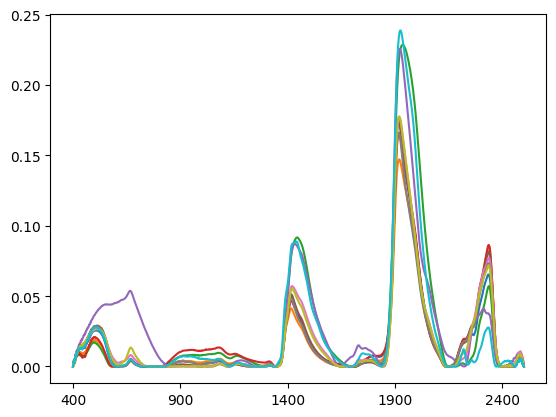

In [23]:
for i in range (0,10,1):
    sampled_cr10_fst.iloc[i,:].plot()

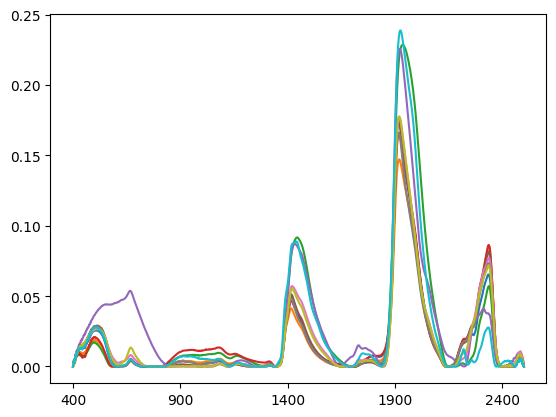

In [24]:
for i in range (0,10,1):
    sampled_cr10.iloc[i,:].plot()

In [15]:
sampled_cr10 = continuum_removed (spec2[51])

In [ ]:
halt here

In [ ]:
sampled_cr10 = resample_at (cr_spec, mid_locs, band_widths)
#sampled_cr10.head(5)

In [ ]:
sampled_log10 = resample_at(log_spec, mid_locs, band_widths)
#sampled_log10.head(5)

In [ ]:
fod_sampled10 = fod (sampled_spec10)
#fod_sampled10.head(5)

In [ ]:
fod_cr10 = fod (sampled_cr10)
#fod_cr10.head(5)

In [ ]:
fod_log10 = fod (sampled_log10)
#fod_log10.head(5)

In [ ]:
import os
os.system('say "your Meta Tree started building"')
import time

In [ ]:
def find_X(p):
    if p == 'fod':
        X = fod_sampled10.copy()
    elif p == 'cr':
        X = sampled_cr10.copy()
    elif p == 'log':
        X = sampled_log10.copy()
    elif p == 'none':
        X = sampled_spec10.copy()
    elif p == 'fod_cr':
        X = fod_cr10.copy()
    else:
        X = fod_log10.copy()
    return X

def find_spec(p, m):    
    spec = find_X(p)
    return spec   

def find_y(t):
    i = target_names.index(t)
    y = T[i].copy()
    return y


In [ ]:
# # prepare_spec = ['none', 'fod2', 'continuum', 'log']
# # prepare_target = ['none', 'minmax']

# def find_X(p):
#     if p == 'fod':
#         X = fod_sampled10
#     elif p == 'cr':
#         X = sampled_cr10
#     elif p == 'log':
#         X = sampled_log10
#     elif p == 'none':
#         X = sampled_spec10
#     elif p == 'fod_cr':
#         X = fod_cr10
#     else:
#         X = fod_log10
#     return X

# def find_spec(p, m):    
#     spec = find_X(p)
#     return spec    


# def find_y(t):
#     i = target_names.index(t) 
#     y = T[i]
#     return y
        
        

## Recording Hypertuning Parameters

In [ ]:
from sklearn.metrics import make_scorer, r2_score

model ={}
param_grid ={}
model['mult'] = LinearRegression()
param_grid['mult'] = { 'fit_intercept': [True, False] }

model['ridge'] = KernelRidge()
param_grid['ridge']={'alpha': [ 0.00001,0.00002, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, \
                               0.005,  0.01, 0.05, 0.1, 0.5, 1]}

model['plsr'] = PLSRegression()
param_grid['plsr']={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


model['cubist'] = Cubist(random_state = 42)  
param_grid['cubist'] = { 'n_committees': [5, 10, 15, 20], 'n_rules': [10, 20, 30, 40, 50] }
                        

model['gbrt'] = GradientBoostingRegressor(random_state = 42)
param_grid['gbrt'] = {
    'n_estimators': [20,30,40,50],        # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1],     # Step size shrinkage used in updating weights
    'max_depth': [3, 4, 5]                # Maximum depth of individual trees
#     'min_samples_split': [2, 3],        # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2],         # Minimum number of samples required to be at a leaf node
}

model['svr'] = SVR()
param_grid['svr'] = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel function
    'gamma': [0.01, 0.1, 1],      # Kernel coefficient (only for 'rbf' kernel)
}


### Finding Hypertuned Parameters

In [ ]:
# def find_core_model_param_on (m, t, p, tp, n):
#     Model = model[m]
#     X = find_spec(p,n,m)
#     y = find_y(t, tp)
    
#     row, col = X.shape

#     scorer = make_scorer(mean_squared_error, greater_is_better=False)
#     cv = RepeatedKFold(n_splits=row, n_repeats=1, random_state=3)
        
#     grid_search = GridSearchCV(Model, param_grid=param_grid[m], cv=cv,\
#                                 scoring= scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)
#     grid_search.fit(X,y)
    
#     return (grid_search.best_params_)

In [ ]:
# def find_tuned_param_on (X_train, y_train, m):
#     Model = model[m]
#     X = X_train
#     y = y_train
    
#     row, col = X.shape

#     scorer = make_scorer(mean_squared_error, greater_is_better=False)
#     cv = RepeatedKFold(n_splits=row, n_repeats=1, random_state=3)
        
#     grid_search = GridSearchCV(Model, param_grid=param_grid[m], cv=cv,\
#                                 scoring= scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)
#     grid_search.fit(X,y)
    
#     return (grid_search.best_params_)
    

In [ ]:
def find_tuned_param_on(X_train, y_train, m):
    Model = model[m]

    # Ensure X_train and y_train are mutable copies
    X = X_train.copy()
    y = y_train.copy()
    
    print(f'Type of X: {type(X)}, Type of y: {type(y)}')
    print(f'Shape of X: {X.shape}, Shape of y: {y.shape}')
    
    row, col = X.shape

    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    cv = RepeatedKFold(n_splits=row, n_repeats=1, random_state=3)
    
    grid_search = GridSearchCV(Model, param_grid=param_grid[m], cv=cv, 
                               scoring=scorer, refit=True, verbose=1, error_score='raise', n_jobs=-1)
    
    grid_search.fit(X, y)
    
    return grid_search.best_params_


### Creating Hypertuned Models

In [ ]:
def create_core_model_on (m, BP):
    if m == 'mult':
        Model = LinearRegression()
        
    elif m == 'ridge':
        Model =  KernelRidge(alpha = BP['alpha'])
        
    elif m == 'plsr':
        Model = PLSRegression(n_components = BP['n_components'])
        
    elif m == 'cubist':
        Model =  Cubist( n_committees = BP['n_committees'], n_rules = BP['n_rules'], random_state = 42) 
    
    elif m == 'gbrt':
        Model = GradientBoostingRegressor(n_estimators = BP['n_estimators'], learning_rate = BP['learning_rate'], \
                                          max_depth = BP['max_depth'],  random_state = 42)
    elif m == 'svr':
        Model = SVR(C = BP['C'], kernel = BP['kernel'], gamma = BP['gamma'])
        
    return Model    
            

## Building HMtree and BPtree

In [ ]:
ml_methods = ['mult', 'ridge', 'plsr', 'svr', 'cubist', 'gbrt']

In [ ]:
def L1_y_pred (spectra, target, method, bp):
    m = method
    (r,c) = spectra.shape
    
    Y_test = target.copy()
    Y_pred = target.copy()
    #print('r:', r)
    for i in range (0, r): 
        #print('i: ', i)
        full_spec = spectra.copy()
        X_train = full_spec.drop(full_spec.index[i], axis=0)
        X_test = full_spec.iloc[[i],:].copy()
        full_tar = target.copy()
        y_train = full_tar.drop(full_tar.index[i], axis=0)
        y_test = full_tar.iloc[i].copy()        
        #---- Model Creation, fitting, and predictions--------
        Model = create_core_model_on (m, bp)
        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test)
        Y_pred.iloc[i] = y_pred
        
    return Y_pred      

In [ ]:
def build_HMtree_on (method_name, target):
    
    tree ={}
    
    start = time.time()
    m = method_name
    t = target
    
    print('tree for: '+ m +' ------> running on: ' + t)
    
    for tp in prepare_target:
        tree[tp] ={}        
        for p in prepare_spec:
            tree[tp][p] ={}            
            
            Y = tree[tp][p]
                                           
            #------ setting spec to appropriate (sampled) spectra----                
            spec = find_spec(p, m)                
                                        
            #---- target selection and normalization ---
            y = find_y(t)
                                
            #---- performing train-test split----------------------
            X_train, X_test, y_train, y_test = train_test_split(spec, y, test_size= 0.3, random_state=42)
                            
            #----- hypertuning parameter, model creation, fitting and prediction ----                
                
            #bp = find_tuned_param_on (X_train, y_train, m)
            bp = find_tuned_param_on (spec, y, m)
                
            Y['bp'] = bp
            print('Method: '+ m + '---> Target: '+ t+ '----> SpecProc: ' +p+ ' ---> n_band: 10')
            Model = create_core_model_on (m, bp)
            Model.fit(X_train, y_train)
                
            y_pred = Model.predict(X_test)
            yhat_pred = Model.predict(X_train)
                    
            #----- Data for Model accuracy and plotting -----------
            Y['X_test'] = X_test                
            Y['y_test'] = y_test
            Y['y_testP'] = y_pred
                
            Y['X_train'] = X_train
            Y['y_train'] = y_train
            Y['y_trainP'] = yhat_pred
                    
            Y['iqrp_test'] = find_iqrp(y_pred, y_test)
            Y['r2_test'] = find_r2(y_pred, y_test)
            Y['rpd_test'] = find_rpd(y_pred, y_test)                 
                
            Y['r2_train'] = find_r2(yhat_pred, y_train)
                
            #------- L1 out prediction on test data -----------------
            L1y_pred = L1_y_pred (spec, y, m, bp)
            Y['L1y_testP'] = L1y_pred
            Y['L1y_test'] = y
             
            
            Y['L1iqrp_test'] = find_iqrp(L1y_pred, y)
            Y['L1r2_test'] = find_r2(L1y_pred, y)
            Y['L1rpd_test'] = find_rpd(L1y_pred, y) 
                
                                                                         
    end = time.time()                            
    os.system('say "your hyper tuned meta tree finished for one more method"')                            

    print('End time - Start time =', (end-start)) 
    
    return tree.copy()

In [ ]:
def build_HMtree_for (method_name):
    tree ={}
    
    start = time.time()
    m = method_name
    for t in target_names:
        #print('tree for: '+ m +' ------> running on: ' + t)
        tree[t] = build_HMtree_on (m, t)
        
    end = time.time()                            
    os.system('say "your meta tree finished for one more method"')                            
    print('End time - Start time =', (end-start))     
    return tree.copy()

In [ ]:
def best_score_on (HMtree, target, method, scorer):
    t=target
    m= method
    
    best_score = -1
    #best_n_comp = 'NA'
    
    
    for tp in prepare_target:
        for p in prepare_spec:
            
            Y = HMtree[m][t][tp][p]
            #r2_train = Y['r2_train']
            #r2_test = Y['r2_test']
            #L1r2_test = Y['L1r2_test']
                 
                    
            if scorer == 'iqrp':
                cur_score = Y['iqrp_test']
            elif scorer == 'L1iqrp':
                cur_score = Y['L1iqrp_test']
            elif scorer == 'r2':
                cur_score = Y['r2_test'] 
            else:
                cur_score = Y['L1r2_test']  
                    
            if cur_score > best_score:
                best_score = cur_score
                best_tp = tp
                best_n = 10
                best_p = p
                            
    param_list = [scorer, np.round(best_score,2), 'Spec:', best_p, 'bands: 10']                                 
    return (param_list)          

In [ ]:
def best_score_on_ncr (HMtree, target, method, scorer):
    t=target
    m= method
    
    best_score = -1
    #best_n_comp = 'NA'
    
    
    for tp in prepare_target:
        for p in prepare_spec:
            
            Y = HMtree[m][t][tp][p]
            #r2_train = Y['r2_train']
            #r2_test = Y['r2_test']
            #L1r2_test = Y['L1r2_test']
                 
                    
            if scorer == 'iqrp':
                cur_score = Y['iqrp_test']
            elif scorer == 'L1iqrp':
                cur_score = Y['L1iqrp_test']
            elif scorer == 'r2':
                cur_score = Y['r2_test'] 
            else:
                cur_score = Y['L1r2_test']  
                    
            if cur_score > best_score and p != 'cr' and p != 'fod_cr':
                best_score = cur_score
                best_tp = tp
                best_n = 10
                best_p = p
                            
    param_list = [scorer, np.round(best_score,2), 'Spec:', best_p, 'bands: 10']                                 
    return (param_list)

In [ ]:
def best_score_for (HMtree, target, scorer):
    
    for method in ml_methods:
        param_list= best_score_on (HMtree, target, method, scorer)
        print('For:'+target+'->', param_list, ':'+method)
     
    return

In [ ]:
def best_score_for_ncr (HMtree, target, scorer):
    
    for method in ml_methods:
        param_list= best_score_on_ncr (HMtree, target, method, scorer)
        print('For:'+target+'->', param_list, ':'+method)
     
    return

In [ ]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

## Creating different branches of Mtree (for separate methods)

In [ ]:
#HMtree = {}

In [ ]:
# HMtree['mult'] = build_HMtree_for('mult')
# HMtree['plsr'] = build_HMtree_for('plsr')
# HMtree['svr'] = build_HMtree_for('svr')
# HMtree['ridge'] = build_HMtree_for('ridge')
# HMtree['cubist'] = build_HMtree_for('cubist')
# HMtree['gbrt'] = build_HMtree_for('gbrt')

In [ ]:
# with open ('HMtree.pickle', 'wb') as file:
#     pickle.dump(HMtree, file)
        

In [ ]:
def plot_model_acc_half (method, target, spec_preprocessing):
    
    m = method
    t = target
    
    i = target_names.index(target)    
    
    p = spec_preprocessing
    #n = n_bands
    tp = 'none'
    
    Y = HMtree[m][t][tp][p]
    
    y_test = Y['y_test']
    y_pred = Y['y_testP']
    L1y_pred = Y['L1y_testP']
    L1y_test = Y['L1y_test']
    

    
    if m == 'plsr':
        y_pred = y_pred[:,0]
        #L1y_pred = L1y_pred[:,0]

    
    iqrp_test = Y['iqrp_test']
    r2_test = Y['r2_test']
    rpd_test = Y['rpd_test']
    
    L1iqrp_test = Y['L1iqrp_test']
    L1r2_test = Y['L1r2_test']
    L1rpd_test = Y['L1rpd_test']
    
    y_tp = pd.DataFrame({'actual':y_test.values, 'predic': y_pred})
    z = np.polyfit(y_test, y_pred, 1)
    
    L1y_tp = pd.DataFrame({'actual':L1y_test.values, 'predic': L1y_pred})
    L1z = np.polyfit(L1y_test, L1y_pred, 1)
    
    fig, (axes1,axes2) = plt.subplots(1,2, figsize=(10,5))
    plt. grid(False)
    
    #with plt.style.context(('ggplot')): ---- PLOT of test-prediction --------------------------------------
    y_tp.plot.scatter(ax= axes1, x="actual", y="predic", alpha=1.0, color = clr[i], edgecolors='k')
    axes1.plot(y_test, np.polyval(z, y_test),  c='blue', linewidth=1)
    axes1.plot(y_test, y_test, color='green', linewidth=1)
    axes1.tick_params(axis='both', labelsize=10)
    axes1.text(0.05, 0.95, target_names[i]+' (Train-Test Score)', transform=axes1.transAxes, fontsize = 14, color = clr[i])
    axes1.text(0.05, 0.90, 'IQRP ={:.2f}'.format(iqrp_test), transform=axes1.transAxes, fontsize = 11)
    axes1.text(0.05, 0.85, 'RPD ={:.2f}'.format(rpd_test), transform=axes1.transAxes, fontsize = 11)
    axes1.text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(r2_test,3)), transform=axes1.transAxes, fontsize = 11)
    axes1.text(0.95, 0.15, 'Method: '+method, transform=axes1.transAxes, 
                    horizontalalignment='right', fontsize = 12)
    
    L1y_tp.plot.scatter(ax= axes2, x="actual", y="predic", alpha=1.0, color = clr[i], edgecolors='k')
    axes2.plot(L1y_test, np.polyval(L1z, L1y_test),  c='blue', linewidth=1)
    axes2.plot(L1y_test, L1y_test, color='green', linewidth=1)
    axes2.tick_params(axis='both', labelsize=10)
    axes2.text(0.05, 0.95, target_names[i]+' (L1-out Score)', transform=axes2.transAxes, fontsize = 14, color = clr[i])
    axes2.text(0.05, 0.90, 'IQRP ={:.2f}'.format(L1iqrp_test), transform=axes2.transAxes, fontsize = 11)
    axes2.text(0.05, 0.85, 'RPD ={:.2f}'.format(L1rpd_test), transform=axes2.transAxes, fontsize = 11)
    axes2.text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(L1r2_test,3)), transform=axes2.transAxes, fontsize = 11)
    axes2.text(0.95, 0.15, 'Method: '+method, transform=axes2.transAxes, 
                    horizontalalignment='right', fontsize = 12)
    
    return


In [ ]:
#ml_methods = ['mult', 'ridge', 'plsr', 'svr', 'cubist', 'gbrt']

ml_methods = ['mult', 'plsr', 'svr', 'ridge', 'cubist','gbrt']

In [ ]:
#best_score_for (HMtree, 'Sand', 'r2')

In [ ]:
best_score_for (HMtree, 'Sand', 'L1r2')

In [ ]:
best_score_for_ncr (HMtree, 'Sand', 'L1r2')

In [ ]:
#best_score_for (HMtree, 'Silt', 'r2')

In [ ]:
best_score_for (HMtree, 'Silt', 'L1r2')

In [ ]:
best_score_for_ncr (HMtree, 'Silt', 'L1r2')

In [ ]:
#best_score_for (HMtree, 'Clay', 'r2')

In [ ]:
best_score_for (HMtree, 'Clay', 'L1r2')

In [ ]:
best_score_for_ncr (HMtree, 'Clay', 'L1r2')

In [ ]:
halt here

In [ ]:
#best_score_for (HMtree, 'TOC', 'r2')

In [ ]:
best_score_for (HMtree, 'TOC', 'L1r2')

In [ ]:
#best_score_for (HMtree, 'CaCO3', 'r2')

In [ ]:
#best_score_for (HMtree, 'CaCO3', 'L1r2')

## Plotting Model Accuracy (ipywidgets)

In [ ]:
ipywidgets.interact( plot_model_acc_half, target = target_names, method = ml_methods, \
                    spec_preprocessing = prepare_spec,  \
                    target_preprocessing = prepare_target)

In [ ]:
# with open ('HMtree.pickle', 'wb') as file:
#     pickle.dump(HMtree, file)

In [ ]:
# MTable = {'Input': ['Hyperspectral', 'Sentinal', 'Venus'], 
#           'Target': ['Sand', 'Sand', 'Sand'], 
#           'plsr': ['R2:0.57  bands:13','R2:0.57 bands:13','R2:0.57  bands:13'],
#           'cubist': ['R2:0.57  bands:13','R2:0.57 bands:13','R2:0.57  bands:13'],
#           'gbrt': ['R2:0.57  bands:13','R2:0.57 bands:13','R2:0.57  bands:13'],
#           'svr': ['R2:0.57  bands:13','R2:0.57 bands:13','R2:0.57  bands:13'],
#           'kridge': ['R2:0.57  bands:13','R2:0.57 bands:13','R2:0.57  bands:13']}
          

In [ ]:
#MTable = pd.DataFrame.from_dict(MTable)


In [ ]:
#pd.set_option('display.colheader_justify', 'center')

In [ ]:
#MTable